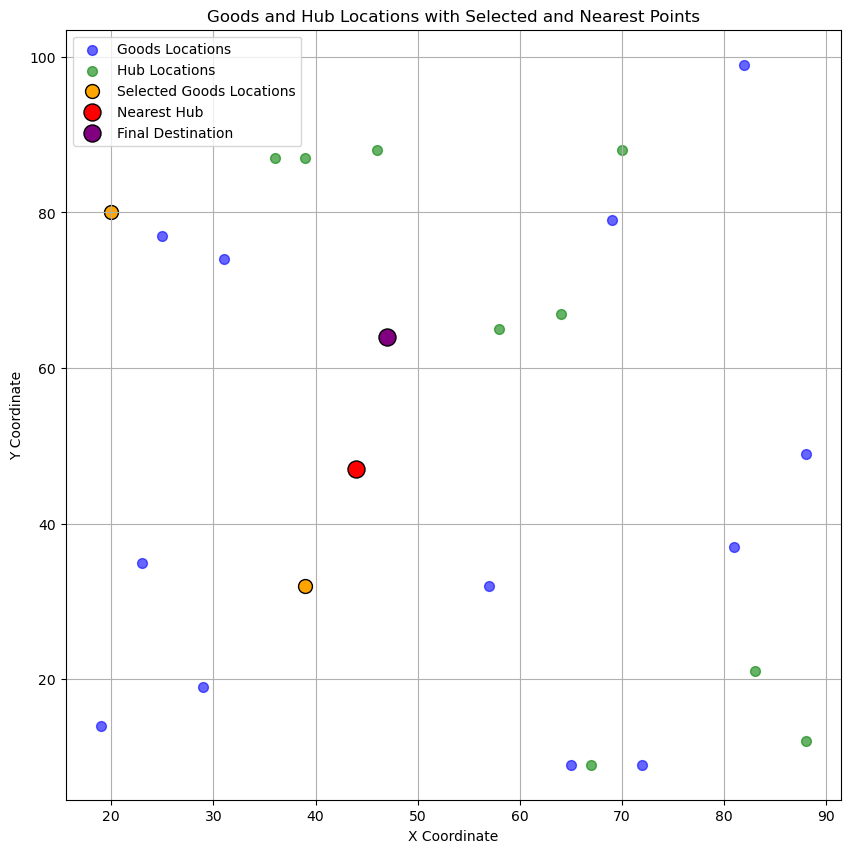

Selected Goods Locations:
   Goods_X  Goods_Y
0       20       80
1       39       32

Single Nearest Hub for Both Goods Locations:
Nearest Hub Location: (44, 47)

Distances and Fuel Cost from Selected Goods Locations to Nearest Hub:
Goods Location 1 -> Nearest Hub:
  Distance: 40.80441152620633
  Fuel Used: 81.60882305241266 liters
  Fuel Cost: 7997.664659136441 rupees
Goods Location 2 -> Nearest Hub:
  Distance: 15.811388300841896
  Fuel Used: 31.622776601683793 liters
  Fuel Cost: 3099.0321069650117 rupees

Final Destination Location and Distance from Nearest Hub:
Final Destination Location: (47, 64) units
Distance to Final Destination: 17.26267650163207 units
Fuel Used : 34.52535300326414 liters
Fuel Cost: 3383.484594319885 rupees


In [3]:
#GROUP MEMBERS 
    #Rahul Aggarwal + Sanchit -> Report 
    #Sameera John -> Code + flow charts 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths for .txt files
nearest_hub_txt = 'nearest_hub_info.txt'
hubs_txt = 'hubs_locations.txt'
goods_locations_txt = 'goods_locations.txt'


grid_size = (100, 100)
num_hubs = 10
num_goods_locations = 15

np.random.seed(0)
hubs = np.random.randint(0, grid_size[0], size=(num_hubs, 2))
goods_locations = np.random.randint(0, grid_size[0], size=(num_goods_locations, 2))

hubs_df = pd.DataFrame(hubs, columns=["Hub_X", "Hub_Y"])
goods_locations_df = pd.DataFrame(goods_locations, columns=["Goods_X", "Goods_Y"])

# Save the generated data as .txt files
hubs_df.to_csv(hubs_txt, sep='\t', index=False)
goods_locations_df.to_csv(goods_locations_txt, sep='\t', index=False)

# Function to load data from .txt files
def load_data_txt(file_path):
    return pd.read_csv(file_path, sep='\t')

# Load data from .txt files
hubs_txt_df = load_data_txt(hubs_txt)
goods_txt_df = load_data_txt(goods_locations_txt)

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Select two random goods locations for delivery
selected_goods = goods_txt_df.sample(2).reset_index(drop=True)

# Select another goods location as the final destination
final_destination = goods_txt_df.sample(1).reset_index(drop=True)
final_destination_point = (final_destination.iloc[0]['Goods_X'], final_destination.iloc[0]['Goods_Y'])

# Calculate the single nearest hub for both selected goods locations and their distances
def find_nearest_hub_for_both_goods(selected_goods, hubs_df):
    #Stores the location from where the goods will be taken   
    goods_points = [(selected_goods.iloc[0]['Goods_X'], selected_goods.iloc[0]['Goods_Y']),
                    (selected_goods.iloc[1]['Goods_X'], selected_goods.iloc[1]['Goods_Y'])]

    #empty variables that will store which of the logistic hubs are closest to the goods points  
    nearest_hub_info = []
    goods_to_hub_distances = []

    #We look at each logistic hub one by one. 
    #Find out where it is on grid.
    #Calculate how far it is from each of the goods location.
    #Add up these distances to get a total distance.
    #Store this information in empty variables.
    for _, hub in hubs_df.iterrows():
        hub_point = (hub['Hub_X'], hub['Hub_Y'])
        distances = [euclidean_distance(goods_point, hub_point) for goods_point in goods_points]
        total_distance = sum(distances)
        
        nearest_hub_info.append({
            'Hub_Location': hub_point,
            'Total_Distance': total_distance
        })
        goods_to_hub_distances.append(distances)

    #Find the one with the smallest total distance (the closest one).
    #Also it remembers the distance of each goods point from the logistic hubs
    nearest_hub_info_df = pd.DataFrame(nearest_hub_info)
    nearest_hub = nearest_hub_info_df.loc[nearest_hub_info_df['Total_Distance'].idxmin()]
    nearest_hub_distances = goods_to_hub_distances[nearest_hub_info_df['Total_Distance'].idxmin()]
    
    return nearest_hub, nearest_hub_distances

# Find the single nearest hub for both selected goods locations
nearest_hub, nearest_hub_distances = find_nearest_hub_for_both_goods(selected_goods, hubs_txt_df)
nearest_hub_location = nearest_hub['Hub_Location']

# Calculate the distance from the nearest hub to the final destination
distance_hub_to_destination = euclidean_distance(nearest_hub_location, final_destination_point)

# Fuel and cost parameters
fuel_per_unit = 2  # Fuel consumption in liters per unit distance
fuel_cost_per_liter = 98  # Fuel cost per liter in rupees

# Calculate fuel usage and cost for each vehicle from goods location to the hub
fuel_usage_goods_to_hub = [dist * fuel_per_unit for dist in nearest_hub_distances]
fuel_cost_goods_to_hub = [usage * fuel_cost_per_liter for usage in fuel_usage_goods_to_hub]

# Calculate fuel usage and cost for the vehicle from the hub to the final destination
fuel_usage_hub_to_destination = distance_hub_to_destination * fuel_per_unit
fuel_cost_hub_to_destination = fuel_usage_hub_to_destination * fuel_cost_per_liter

# Plotting all locations and highlighting the selected points
plt.figure(figsize=(10, 10))

# Plot all goods locations
plt.scatter(goods_txt_df['Goods_X'], goods_txt_df['Goods_Y'], color='blue', label='Goods Locations', s=50, alpha=0.6)

# Plot all hubs
plt.scatter(hubs_txt_df['Hub_X'], hubs_txt_df['Hub_Y'], color='green', label='Hub Locations', s=50, alpha=0.6)

# Highlight the selected goods locations
plt.scatter(selected_goods['Goods_X'], selected_goods['Goods_Y'], color='orange', label='Selected Goods Locations', s=100, edgecolor='black')

# Highlight the nearest hub
plt.scatter(nearest_hub_location[0], nearest_hub_location[1], color='red', label='Nearest Hub', s=150, edgecolor='black')

# Highlight the final destination
plt.scatter(final_destination_point[0], final_destination_point[1], color='purple', label='Final Destination', s=150, edgecolor='black')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Goods and Hub Locations with Selected and Nearest Points')
plt.legend()
plt.grid(True)
plt.show()

# Display final result
print("Selected Goods Locations:")
print(selected_goods)
print("\nSingle Nearest Hub for Both Goods Locations:")
print(f"Nearest Hub Location: {nearest_hub_location}")
print("\nDistances and Fuel Cost from Selected Goods Locations to Nearest Hub:")
for i, distance in enumerate(nearest_hub_distances):
    print(f"Goods Location {i+1} -> Nearest Hub:")
    print(f"  Distance: {distance}")
    print(f"  Fuel Used: {fuel_usage_goods_to_hub[i]} liters")
    print(f"  Fuel Cost: {fuel_cost_goods_to_hub[i]} rupees")

print("\nFinal Destination Location and Distance from Nearest Hub:")
print(f"Final Destination Location: {final_destination_point} units")
print(f"Distance to Final Destination: {distance_hub_to_destination} units")
print(f"Fuel Used : {fuel_usage_hub_to_destination} liters")
print(f"Fuel Cost: {fuel_cost_hub_to_destination} rupees")
